<h1>Project 3</h1>

<h2>Avacado Dataset</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('AvacadoDataset.csv',parse_dates=["Date"])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<h2>Start of EDA process</h2>

***Checking data types and null count of the columns***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   int64         
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 154.2+ KB


**Observation** : There is no null or NAN value in the table

In the data set, the columns 4046,4225,4770, represents Total number of avocados with PLU 4046 sold,Total number of avocados with PLU 4225 sold,Total number of avocados with PLU 4770 sold respectively


***Checking shape of the Dataset***

In [4]:
df.shape

(1517, 13)

We see that table contains **1517 rows** and **13 columns**

***Checking unique elements in type with visualization***

AxesSubplot(0.125,0.125;0.775x0.755)


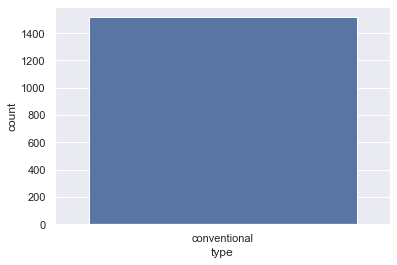

In [5]:
print(sns.countplot(df['type']))

In [6]:

df['type'].unique()

array(['conventional'], dtype=object)

Since there is only one type i.e, Conventional in type column, we drop drop this column since it is not useful for us in our model selection or prediction

***Checking unique elements in year with visualization***

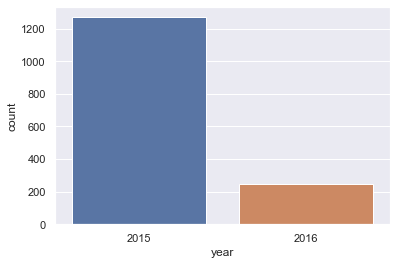

In [7]:
sns.countplot(x="year", data=df)

In [8]:
df['year'].unique()

array([2015, 2016], dtype=int64)

We can see that in year attribute the year 2016 is significantly low compared to year 2015, so this might not be a best feature to be used in our model since it is highly biased

***Lets check Average price as per the region***

In [9]:
df_group= df[['region','AveragePrice']]
df_group= df_group.groupby(['region'],as_index=False).mean()
df_group

,region,AveragePrice
0,Albany,1.238657
1,Atlanta,1.012037
2,BaltimoreWashington,1.160923
3,Boise,0.974923
4,Boston,1.205484
5,BuffaloRochester,1.301569
6,California,1.055921
7,Charlotte,1.311613
8,Chicago,1.214783
9,Columbus,1.012553


In [10]:
df_group.max()

region          WestTexNewMexico
AveragePrice             1.34737
dtype: object

WestTexNewMexico in region has highest average price

In [11]:
df_group.min()

region            Albany
AveragePrice    0.659808
dtype: object

Albany in region has loswest average price

***Lets explore average price with Date***

In [12]:
df_group= df[['Date','AveragePrice']]
df_group= df_group.groupby(['Date'],as_index=False).mean()
df_group

,Date,AveragePrice
0,2015-01-02,0.950833
1,2015-01-03,1.044333
2,2015-01-11,1.023182
3,2015-01-18,1.108571
4,2015-01-25,1.080455
...,...,...
99,2016-11-20,1.456667
100,2016-11-27,1.418333
101,2016-12-06,1.197500
102,2016-12-18,1.198333


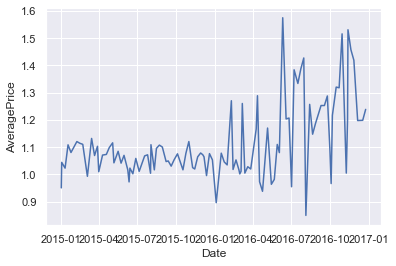

In [13]:
sns.lineplot(x="Date",y="AveragePrice",data=df_group)

In [14]:
df_group.max()

Date            2016-12-25 00:00:00
AveragePrice                  1.574
dtype: object

AveragePrice was maximum on Date 2016-12-25

In [15]:
df_group.min()

Date            2015-01-02 00:00:00
AveragePrice                   0.85
dtype: object

AveragePrice was minimum on Date 2015-01-02

***Dropping Date, type and year since they have no purpose to serve anymore***

In [16]:
df=df.drop(['Date','type','year'],axis=1)

In [17]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


***Checking for outliers***

*First we will check for outliers visually for each attributes, for this box plot is the best option*

AxesSubplot(0.125,0.125;0.775x0.755)


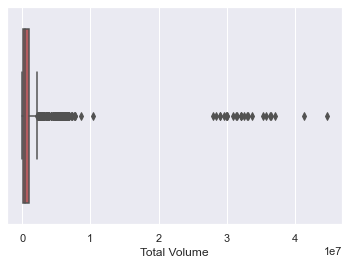

AxesSubplot(0.125,0.125;0.775x0.755)


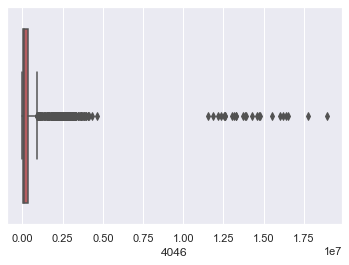

AxesSubplot(0.125,0.125;0.775x0.755)


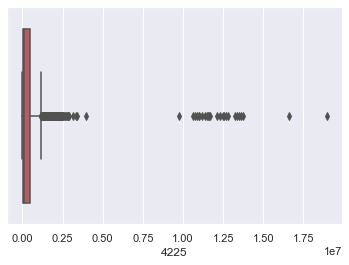

AxesSubplot(0.125,0.125;0.775x0.755)


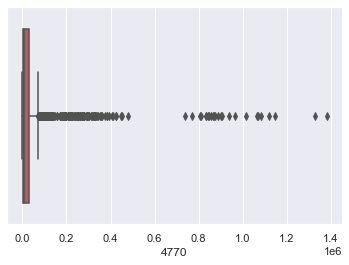

AxesSubplot(0.125,0.125;0.775x0.755)


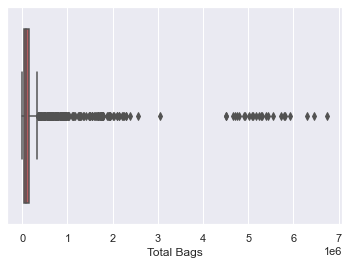

AxesSubplot(0.125,0.125;0.775x0.755)


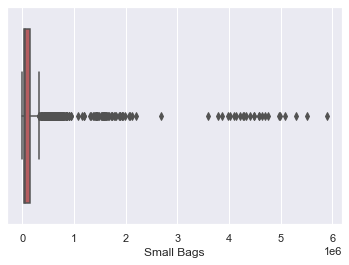

AxesSubplot(0.125,0.125;0.775x0.755)


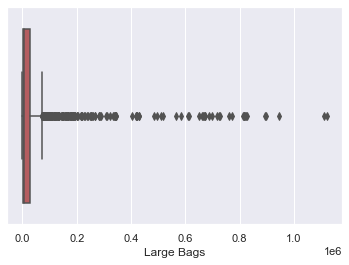

AxesSubplot(0.125,0.125;0.775x0.755)


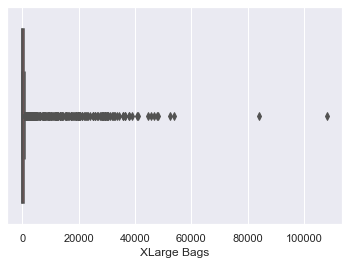

In [18]:
col=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in range(0,8):
    print(sns.boxplot(df[col[i]],color='r'))
    plt.show()

We can see visually that there are multiple dots outside the plot which are indicating outliers, here its huge

***Before removing outliers, lets convert region also to interger values, so it will be easier for us to do further process***

***Converting categorical in to numerical using label encoder***

In [19]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['region'])
Region=le.transform(df['region'])
df=df.drop(['region'],axis=1)
region=pd.DataFrame(Region)
df['region']=region
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


*Now, we will remove these outliers using below code*

In [21]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
print('The shape of the dataset before removing outliers is',df.shape)
df_z = df[(z < 3).all(axis=1)]
print('The shape of the dataset after removing outliers is',df_z.shape)
df=df_z

The shape of the dataset before removing outliers is (1517, 10)
The shape of the dataset after removing outliers is (1436, 10)


***Lets calculate correlation***

In [22]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,1.000000,-0.271504,-0.380282,-0.120872,-0.110292,-0.157514,-0.135342,-0.229402,-0.069536,-0.212618
Total Volume,-0.271504,1.000000,0.914238,0.916256,0.708447,0.875613,0.859114,0.750335,0.329997,0.159801
4046,-0.380282,0.914238,1.000000,0.696312,0.545078,0.665928,0.642025,0.630837,0.183037,0.227472
4225,-0.120872,0.916256,0.696312,1.000000,0.678638,0.853477,0.844277,0.698375,0.303602,0.088169
4770,-0.110292,0.708447,0.545078,0.678638,1.000000,0.730976,0.741428,0.484775,0.645120,-0.068400
Total Bags,-0.157514,0.875613,0.665928,0.853477,0.730976,1.000000,0.992654,0.791824,0.516496,0.076941
Small Bags,-0.135342,0.859114,0.642025,0.844277,0.741428,0.992654,1.000000,0.712355,0.533439,0.045297
Large Bags,-0.229402,0.750335,0.630837,0.698375,0.484775,0.791824,0.712355,1.000000,0.263228,0.227399
XLarge Bags,-0.069536,0.329997,0.183037,0.303602,0.645120,0.516496,0.533439,0.263228,1.000000,-0.175977
region,-0.212618,0.159801,0.227472,0.088169,-0.068400,0.076941,0.045297,0.227399,-0.175977,1.000000


***Lets visualize using heat map as well***

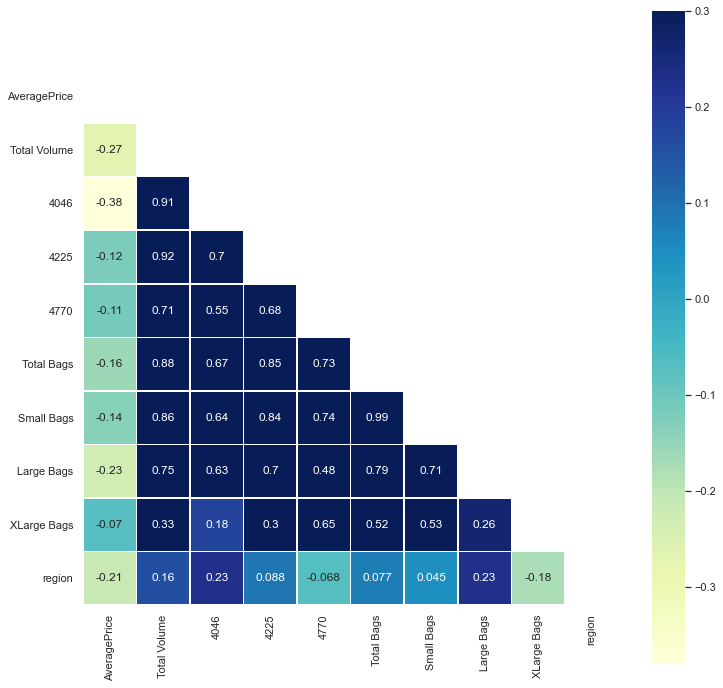

In [23]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True, linewidths=0.5,cmap="YlGnBu")

***Lets find out the columns that are not correlated with our output variables and which are not useful to us in any way***

In [24]:
df1=df.corr()
#since we only care about the correlation with our output, lets separate it
df2=df1.iloc[0:1,:]
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,1.0,-0.271504,-0.380282,-0.120872,-0.110292,-0.157514,-0.135342,-0.229402,-0.069536,-0.212618


In [25]:
df3=df1.iloc[9:10,:]
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
region,-0.212618,0.159801,0.227472,0.088169,-0.0684,0.076941,0.045297,0.227399,-0.175977,1.0


If the value is 0 there is no correlation, if value is 1 they are highly correlated.

***Lets set our threshold value as 0.1 and drop columns with value less than this considering they are not correlated***

In [26]:
np.abs(df2)<0.1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,False,False,False,False,False,False,False,False,True,False


In [27]:
np.abs(df3)<0.1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
region,False,False,False,True,True,True,True,False,False,False


From above data we can see that while doing regression we can drop XLarge Bags column

And drop 4225,4770,Total Bags,Small Bags while doing classification

*We are using regplot here to visualize the same. There is a line that passes through the points in the plot which will give us an idea if that column is positively correlated or negatively correlated or not correlated at all.
If the line comes close to horizontal, we can assume that its not correlated and drop such columns as those columns are not helping us in any way to make our prediction.*

AxesSubplot(0.125,0.125;0.775x0.755)


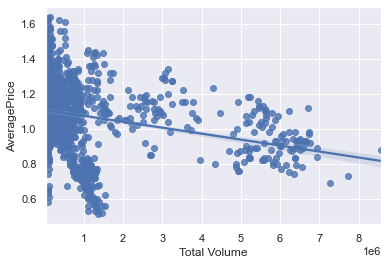

AxesSubplot(0.125,0.125;0.775x0.755)


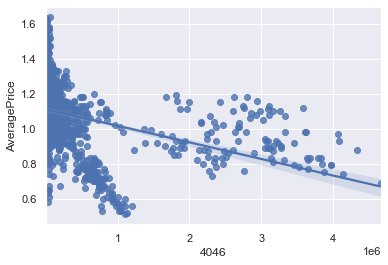

AxesSubplot(0.125,0.125;0.775x0.755)


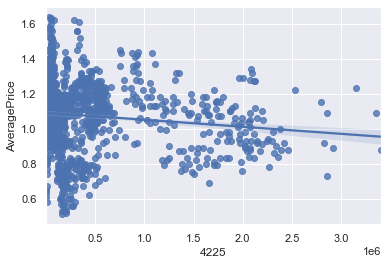

AxesSubplot(0.125,0.125;0.775x0.755)


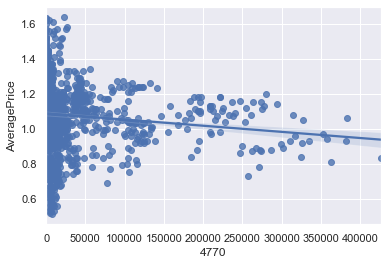

AxesSubplot(0.125,0.125;0.775x0.755)


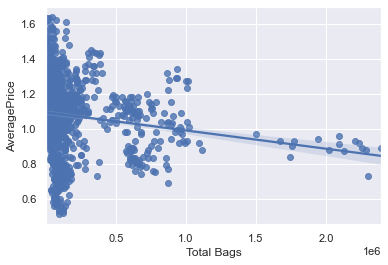

AxesSubplot(0.125,0.125;0.775x0.755)


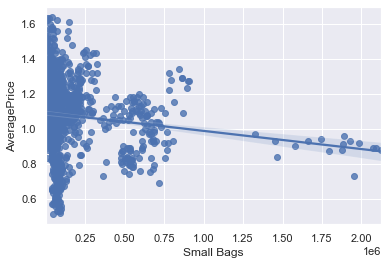

AxesSubplot(0.125,0.125;0.775x0.755)


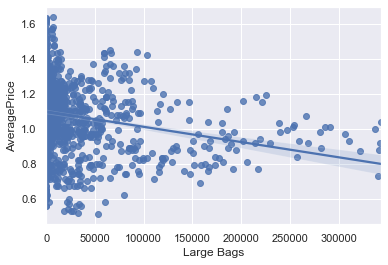

AxesSubplot(0.125,0.125;0.775x0.755)


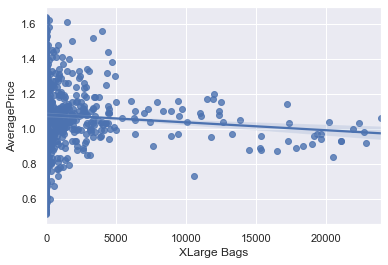

In [28]:
col=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in range(0,8):
    print(sns.regplot(x=col[i],y="AveragePrice",data=df))
    plt.show()

We can see that the data is higly skewed, because maximum points are concentrated towards left side

***Separating our input and output features***

In [29]:
x=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
y1=df[['AveragePrice']]
y2=df[['region']]

***Lets check for skewness in our input features***

In [30]:
x.skew()

Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
dtype: float64

We can see that data is highly skewed since all the values are above 0.55

***Lets eliminate the skewness in our input attributes***

In [31]:
for i in x.skew().index:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [32]:
x.skew()

Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
dtype: float64

In [33]:
for i in x.skew().index:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

Trying to apply log again to check if the skewness can be further reduced

In [34]:
x.skew()

Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.451310
dtype: float64

Skewness is significantly removed in majority of the columns compared to before so we can accept this data

***Lets scale our data using standard scalar***

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
df_x=ss.transform(x)
df_x

array([[-1.41093543, -1.84734499, -0.50791653, ..., -1.64854683,
        -0.91741949, -0.8548905 ],
       [-1.53565988, -2.04282289, -0.63518322, ..., -1.5736223 ,
        -0.90419602, -0.8548905 ],
       [-0.92782951, -1.96816868, -0.06269814, ..., -1.70510898,
        -0.88743353, -0.8548905 ],
       ...,
       [-0.60188503, -0.11877204, -0.5265446 , ..., -0.11923099,
         0.42677659,  1.32495309],
       [-0.55566806, -0.04848702, -0.51812425, ..., -0.08352227,
         0.42750703, -0.8548905 ],
       [-0.58186397, -0.15181664, -0.51099782, ..., -0.0567983 ,
         0.53012844, -0.8548905 ]])

Data is scaled but it is in array, lets convert it in to dataframe

In [36]:
x=pd.DataFrame(df_x,columns=x.columns)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-1.410935,-1.847345,-0.507917,-1.815979,-1.822359,-1.648547,-0.917419,-0.85489
1,-1.535660,-2.042823,-0.635183,-1.739119,-1.746806,-1.573622,-0.904196,-0.85489
2,-0.927830,-1.968169,-0.062698,-1.413794,-1.878029,-1.705109,-0.887434,-0.85489
3,-1.247168,-1.807390,-0.329300,-1.651131,-2.164946,-1.996977,-0.809976,-0.85489
4,-1.593074,-1.891150,-0.646768,-1.633730,-2.112115,-1.952576,-0.693305,-0.85489


In [37]:
y1.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [38]:
y2.head()

,region
0,0
1,0
2,0
3,0
4,0


***Lets get our input attributes ready for y1 and y2 based on our correaltion analysis***

while doing regression we can drop XLarge Bags column

And drop 4225,4770,Total Bags,Small Bags while doing classification

In [39]:
x1=x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags']]
x1.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,-1.410935,-1.847345,-0.507917,-1.815979,-1.822359,-1.648547,-0.917419
1,-1.535660,-2.042823,-0.635183,-1.739119,-1.746806,-1.573622,-0.904196
2,-0.927830,-1.968169,-0.062698,-1.413794,-1.878029,-1.705109,-0.887434
3,-1.247168,-1.807390,-0.329300,-1.651131,-2.164946,-1.996977,-0.809976
4,-1.593074,-1.891150,-0.646768,-1.633730,-2.112115,-1.952576,-0.693305


In [40]:
x2=x[['Total Volume','4046','Large Bags','XLarge Bags']]
x2.head()

,Total Volume,4046,Large Bags,XLarge Bags
0,-1.410935,-1.847345,-0.917419,-0.85489
1,-1.535660,-2.042823,-0.904196,-0.85489
2,-0.927830,-1.968169,-0.887434,-0.85489
3,-1.247168,-1.807390,-0.809976,-0.85489
4,-1.593074,-1.891150,-0.693305,-0.85489


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

**Lets first do regression for our y1 output that is AveragePrice**

***Lets import required packages***

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

***Lets split our data randomly and see which model works better***

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=50)

***Lets import all the regression models***

In [43]:
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)

In [44]:
models=[]
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

***Lets create a loop that will execute all our models***

In [45]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= abs(cross_val_score(model,x1,y1,cv=10,scoring='r2')).mean()
    print('Cross_Val_Score = ',score*100)
    cvs.append(score*100)
    print('\n')

*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  -0.23213927084280161
Mean_Squared_Error = 0.03738017721911291
Cross_Val_Score =  14.134898753629338


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  39.544548898598606
Mean_Squared_Error = 0.022546016601774528
Cross_Val_Score =  31.31914573804525


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  -0.23213927084280161
Mean_Squared_Error = 0.03738017721911291
Cross_Val_Score =  14.134898753629338


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  69.38520322452469
Mean_Squared_Error = 0.01141736111111111
Cross_Val_Score =  74.72610043887795


*-----------------------------* KNeighborsRegressor *------------------------------*
KNeighborsRegressor()
R2_score =  77.1694170529044
Mean_Squared_Error = 0.00851434722222222
C

In [46]:
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE,'Cross Validation score':cvs})
result

,Regression Model,R2 Score,Mean Squared Error,Cross Validation score
0,Lasso,-0.232139,0.037380,14.134899
1,Ridge,39.544549,0.022546,31.319146
2,ElasticNet,-0.232139,0.037380,14.134899
3,DecisionTreeRegressor,69.385203,0.011417,74.726100
4,KNeighborsRegressor,77.169417,0.008514,54.447783
5,AdaBoostRegressor,58.771602,0.015376,32.289840
6,RandomForestRegressor,80.041893,0.007443,45.901081
7,GradientBoostingRegressor,71.187097,0.010745,45.472513


**Out of all the models we see that KNeighborsRegressor and RandomForestRegressor is performing comparitively better.**

**We will choose KNeighborsRegressor because Cross Validation score for this model is better and is indicating that it is not over or under fitting our data, but for RandomForestRegressor Cross Validation score is too low**

**We are getting maximum accuracy of only 77.16%, lets try to make our model better so that our accuracy increases**

***Lets find best hyperparameters for KNeighborsRegressor using grid search***

In [47]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
clf = GridSearchCV(KNR, hyperparameters, cv=10)
best_model = clf.fit(x1,y1)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 29


***Buliding Final Model***

In [48]:
KNN=KNeighborsRegressor(n_neighbors=29,leaf_size=1, p=1)
KNN.fit(x_train,y_train)
pre=KNN.predict(x_test)
r2=r2_score(y_test,pre)
print('R2_score = ',r2)
mse=mean_squared_error(y_test,pre)
print("Mean_Squared_Error =",mse)
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,pre)))
score= abs(cross_val_score(KNN,x1,y1,cv=10,scoring='r2')).mean()
print('Cross_Val_Score = ',score)

R2_score =  0.6366941553569229
Mean_Squared_Error = 0.013548984344034877
RMSE is :  0.11640010457054958
Cross_Val_Score =  0.36740525133101876


In [49]:
KNN1=KNeighborsRegressor()
KNN1.fit(x_train,y_train)
pre=KNN1.predict(x_test)
r2=r2_score(y_test,pre)
print('R2_score = ',r2)
mse=mean_squared_error(y_test,pre)
print("Mean_Squared_Error =",mse)
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,pre)))
score= abs(cross_val_score(KNN1,x1,y1,cv=10,scoring='r2')).mean()
print('Cross_Val_Score = ',score)

R2_score =  0.7716941705290439
Mean_Squared_Error = 0.00851434722222222
RMSE is :  0.09227322050422983
Cross_Val_Score =  0.5444778323995443


Our model is giving better accuracy and minimum error with acceptable cross validation score for default values itself, hence we are going to finalise that only as our final model

***Lets visualize the performace of our model***

***Improting libraries for plotting***

In [50]:
%%capture
! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [51]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Input features')
    plt.ylabel('Average Price')
    plt.show()
    plt.close()
    
def PollyPlot(x_train, x_test, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

***Creating Functions for Plotting***

Prediction using train data:

In [52]:
yh_train = KNN1.predict(x_train)

Prediction using test data:

In [53]:
yh_test = KNN1.predict(x_test)

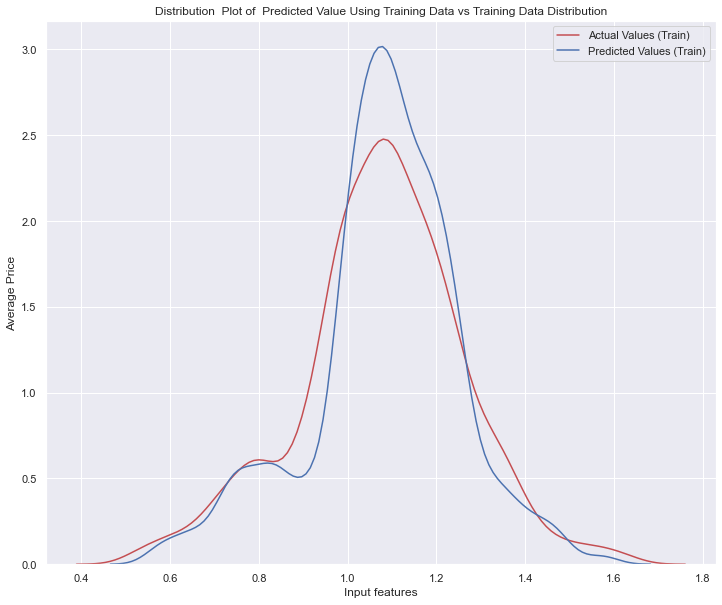

In [54]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yh_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

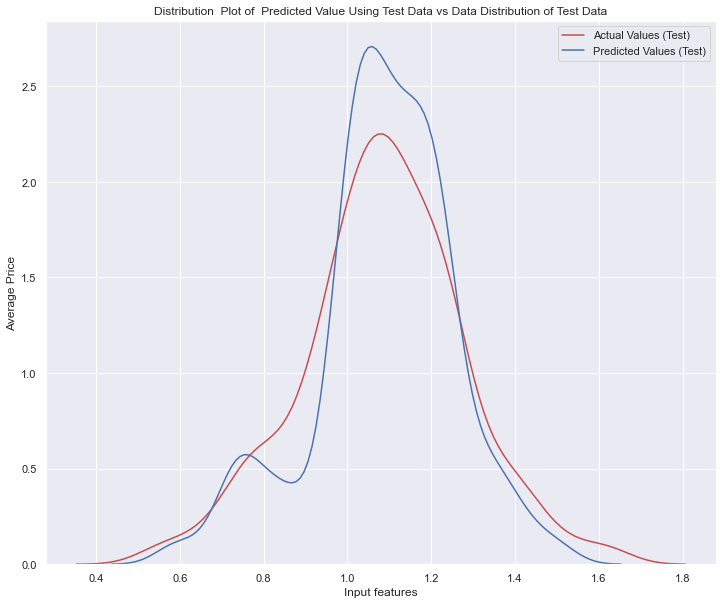

In [55]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yh_test,"Actual Values (Test)","Predicted Values (Test)",Title)


<h2>End of Machine learning Process for Regression</h2>


<h1>Now lets save our final model for Regression</h1>

In [56]:
import joblib
joblib.dump(KNN1,'Avacado_Regression.pkl')

['Avacado_Regression.pkl']

**Lets do classification for our y2 output that is region**

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=42)
from sklearn.metrics import classification_report,accuracy_score

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

MultinomialNB is not inculded because after scaling our data has negative values

In [59]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)

In [60]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))

In [61]:
Model = []
score = []
cvs=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS*100)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x2, y2, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc*100)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n\n')

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  75.87006960556845


Cross_Val_Score =  78.0696386946387


classification_report
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.57      0.87      0.68        15
           2       0.86      0.90      0.88        21
           3       0.68      1.00      0.81        15
           4       0.72      0.93      0.81        14
           5       0.93      0.88      0.90        16
           6       0.87      1.00      0.93        13
           7       0.59      0.83      0.69        12
           8       0.62      0.71      0.67         7
           9       0.65      1.00      0.79        15
          10       0.86      0.86      0.86         7
          11       0.75      0.86      0.80         7
          12       0.94      1.00      0.97        17
          13      

Cross_Val_Score =  78.27068764568764


classification_report
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.71      0.67      0.69        15
           2       0.86      0.90      0.88        21
           3       0.93      0.93      0.93        15
           4       1.00      0.86      0.92        14
           5       0.88      0.88      0.88        16
           6       0.81      1.00      0.90        13
           7       0.64      0.58      0.61        12
           8       0.50      0.57      0.53         7
           9       0.76      0.87      0.81        15
          10       0.86      0.86      0.86         7
          11       1.00      1.00      1.00         7
          12       0.94      1.00      0.97        17
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         2
          15       0.78      0.70      0.74        10
          16       

In [62]:
result = pd.DataFrame({'Classification Model': Model, 'Accuracy score': score ,'Cross Validation Score':cvs})
result

,Classification Model,Accuracy score,Cross Validation Score
0,KNeighborsClassifier,75.870070,78.069639
1,SVC,67.285383,71.240773
2,LogisticRegression,61.252900,66.570513
3,DecisionTreeClassifier,80.510441,78.270688


KNeighborsClassifier is giving accuracy less than DecisionTreeClassifier but Cross validation of both of them seems to be same, so lets try to find hyper parameters for the same and see if it improves our model performance. 

***Lets find best hyperparameters for KNeighborsClassifier using grid search***

In [63]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
clf = GridSearchCV(KNN, hyperparameters, cv=10)
best_model = clf.fit(x2,y2)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


***Buliding Final Model***

In [64]:
KNC=KNeighborsClassifier(n_neighbors=1,leaf_size=1, p=2)
KNC.fit(x_train,y_train)
pre=KNC.predict(x_test)
AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS*100)
sc = abs(cross_val_score(KNC, x2, y2, cv=10, scoring='accuracy')).mean()
print('Cross_Val_Score = ',sc*100)


Accuracy_score =  84.68677494199535
Cross_Val_Score =  83.70095182595183


***Lets visualize the performace of our model***

***Creating Functions for Plotting***

In [71]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Input features')
    plt.ylabel('region')
    plt.show()
    plt.close()

Prediction using test data:

In [73]:
yh_test = KNC.predict(x_test)

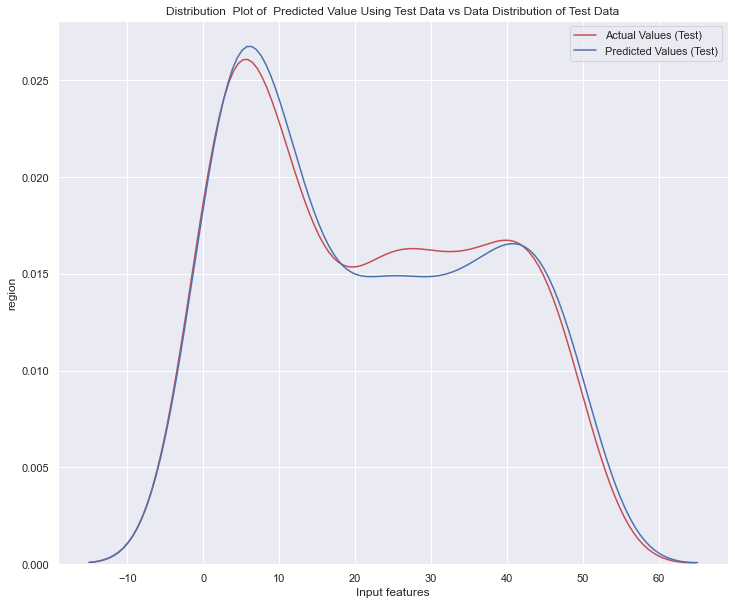

In [75]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yh_test,"Actual Values (Test)","Predicted Values (Test)",Title)


<h1>Now lets save our final model for classification</h1>

In [70]:
joblib.dump(KNC,'Avacado_Classification.pkl')

['Avacado_Classification.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">